In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.models import load_model

Using TensorFlow backend.


In [3]:
from keras import models
from keras import layers
from keras import optimizers

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
from keras.callbacks import EarlyStopping

In [6]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 8s 0us/step


In [197]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [87]:
conv_base.trainable = False

Complete the first 3 steps:

    1) Add your custom network on top of an already trained base network.
    2) Freeze the base network.
    3) Train the part you added.

In [213]:
del model

In [214]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(no_cats, activation='softmax'))

print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_17 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 30)                7710      
Total params: 16,819,806
Trainable params: 2,105,118
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [215]:
len(model.trainable_weights)

4

In [216]:
conv_base.trainable = False

In [217]:
len(model.trainable_weights)

4

In [57]:
base_dir = 'data/categories_castle'
no_cats = 30

In [58]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
batch_size = 1

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 30 images belonging to 30 classes.
Found 30 images belonging to 30 classes.


In [221]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [222]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [223]:
history = model.fit_generator(train_generator,
                    epochs=300,
                    validation_data=validation_generator,
#                     callbacks=[es]
                             )

Epoch 1/300
30/30 [==============================] - 5s 167ms/step - loss: 3.8259 - acc: 0.0667 - val_loss: 3.8031 - val_acc: 0.0333
Epoch 2/300
30/30 [==============================] - 5s 163ms/step - loss: 3.7747 - acc: 0.0333 - val_loss: 3.8685 - val_acc: 0.0333
Epoch 3/300
30/30 [==============================] - 5s 164ms/step - loss: 3.7537 - acc: 0.0333 - val_loss: 3.9190 - val_acc: 0.0333
Epoch 4/300
30/30 [==============================] - 5s 171ms/step - loss: 3.7752 - acc: 0.0000e+00 - val_loss: 3.9702 - val_acc: 0.1000
Epoch 5/300
30/30 [==============================] - 5s 177ms/step - loss: 3.6204 - acc: 0.0667 - val_loss: 3.8615 - val_acc: 0.0667
Epoch 6/300
30/30 [==============================] - 5s 174ms/step - loss: 3.4929 - acc: 0.0667 - val_loss: 3.7052 - val_acc: 0.0667
Epoch 7/300
30/30 [==============================] - 5s 171ms/step - loss: 3.7320 - acc: 0.0000e+00 - val_loss: 3.7168 - val_acc: 0.1333
Epoch 8/300
30/30 [==============================] - 6s 197ms

30/30 [==============================] - 6s 195ms/step - loss: 2.2702 - acc: 0.4000 - val_loss: 2.1661 - val_acc: 0.6333
Epoch 63/300
30/30 [==============================] - 5s 176ms/step - loss: 2.3266 - acc: 0.3000 - val_loss: 2.0738 - val_acc: 0.6667
Epoch 64/300
30/30 [==============================] - 5s 164ms/step - loss: 2.1016 - acc: 0.5333 - val_loss: 2.1397 - val_acc: 0.6333
Epoch 65/300
30/30 [==============================] - 5s 171ms/step - loss: 2.2362 - acc: 0.4667 - val_loss: 2.0535 - val_acc: 0.6000
Epoch 66/300
30/30 [==============================] - 5s 164ms/step - loss: 2.2540 - acc: 0.4667 - val_loss: 2.0503 - val_acc: 0.6667
Epoch 67/300
30/30 [==============================] - 5s 179ms/step - loss: 1.9773 - acc: 0.5333 - val_loss: 2.0904 - val_acc: 0.6333
Epoch 68/300
30/30 [==============================] - 7s 218ms/step - loss: 2.2183 - acc: 0.5000 - val_loss: 2.0514 - val_acc: 0.6000
Epoch 69/300
30/30 [==============================] - 5s 174ms/step - loss:

Epoch 123/300
30/30 [==============================] - 5s 178ms/step - loss: 1.5365 - acc: 0.6667 - val_loss: 1.4456 - val_acc: 0.7333
Epoch 124/300
30/30 [==============================] - 5s 173ms/step - loss: 1.2142 - acc: 0.8000 - val_loss: 1.4502 - val_acc: 0.7333
Epoch 125/300
30/30 [==============================] - 5s 170ms/step - loss: 1.1220 - acc: 0.8000 - val_loss: 1.4254 - val_acc: 0.7667
Epoch 126/300
30/30 [==============================] - 5s 167ms/step - loss: 1.3073 - acc: 0.6333 - val_loss: 1.4165 - val_acc: 0.7333
Epoch 127/300
30/30 [==============================] - 5s 174ms/step - loss: 1.1838 - acc: 0.7667 - val_loss: 1.5750 - val_acc: 0.6667
Epoch 128/300
30/30 [==============================] - 5s 168ms/step - loss: 1.0732 - acc: 0.7667 - val_loss: 1.5751 - val_acc: 0.6667
Epoch 129/300
30/30 [==============================] - 5s 182ms/step - loss: 1.2988 - acc: 0.7667 - val_loss: 1.5170 - val_acc: 0.7333
Epoch 130/300
30/30 [==============================] - 

Epoch 244/300
30/30 [==============================] - 12s 386ms/step - loss: 0.4746 - acc: 0.8333 - val_loss: 0.3828 - val_acc: 0.8000
Epoch 245/300
30/30 [==============================] - 11s 358ms/step - loss: 0.5337 - acc: 0.9000 - val_loss: 0.3932 - val_acc: 0.8667
Epoch 246/300
30/30 [==============================] - 11s 381ms/step - loss: 0.2542 - acc: 1.0000 - val_loss: 0.4358 - val_acc: 0.8000
Epoch 247/300
30/30 [==============================] - 8s 260ms/step - loss: 0.4532 - acc: 0.9000 - val_loss: 0.5011 - val_acc: 0.8333
Epoch 248/300
30/30 [==============================] - 14s 471ms/step - loss: 0.3204 - acc: 0.9667 - val_loss: 0.4574 - val_acc: 0.8333
Epoch 249/300
30/30 [==============================] - 12s 397ms/step - loss: 0.4079 - acc: 0.9333 - val_loss: 0.4249 - val_acc: 0.8667
Epoch 250/300
30/30 [==============================] - 10s 335ms/step - loss: 0.5477 - acc: 0.9000 - val_loss: 0.3777 - val_acc: 0.8000
Epoch 251/300
30/30 [============================

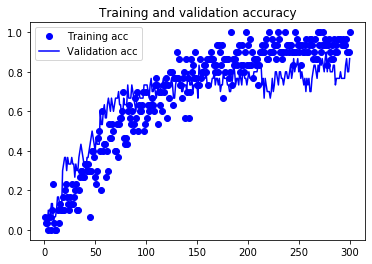

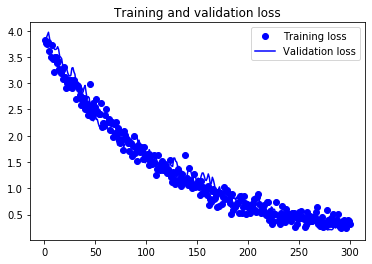

In [224]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [225]:
model.save('castle_30_vgg_features_with_data_augmentation.h5')

Steps: 4-5

    4) Unfreeze some layers in the base network.
    5) Jointly train both these layers and the part you added.

In [19]:
model = load_model('castle_30_vgg_features_with_data_augmentation.h5')

/usr/local/lib/python3.6/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [28]:
len(model.trainable_weights)

30

If loaded in 

In [51]:
# set_trainable = False
# for layer in model.get_layer("vgg16")._layers:
#     layer.trainable = False
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [89]:
# len(model.trainable_weights)

If using conv_base:

In [49]:
conv_base.trainable = True

In [50]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [53]:
len(model.trainable_weights)

In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [55]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [60]:
history = model.fit_generator(train_generator,
                    epochs=70,
                    validation_data=validation_generator,
#                     callbacks=[es]
                             )

Epoch 1/70
30/30 [==============================] - 7s 221ms/step - loss: 0.2452 - acc: 1.0000 - val_loss: 0.1394 - val_acc: 0.8667
Epoch 2/70
30/30 [==============================] - 7s 217ms/step - loss: 0.2528 - acc: 0.9333 - val_loss: 0.2680 - val_acc: 0.7667
Epoch 3/70
30/30 [==============================] - 6s 216ms/step - loss: 0.2704 - acc: 0.9667 - val_loss: 0.1379 - val_acc: 0.8667
Epoch 4/70
30/30 [==============================] - 7s 220ms/step - loss: 0.4471 - acc: 0.8333 - val_loss: 0.0667 - val_acc: 0.8667
Epoch 5/70
30/30 [==============================] - 7s 218ms/step - loss: 0.1301 - acc: 0.9667 - val_loss: 0.0866 - val_acc: 0.8667
Epoch 6/70
30/30 [==============================] - 7s 217ms/step - loss: 0.1182 - acc: 0.9667 - val_loss: 0.0643 - val_acc: 0.8667
Epoch 7/70
30/30 [==============================] - 7s 225ms/step - loss: 0.1095 - acc: 0.9667 - val_loss: 0.1002 - val_acc: 0.8667
Epoch 8/70
30/30 [==============================] - 8s 250ms/step - loss: 0.

30/30 [==============================] - 7s 224ms/step - loss: 0.0178 - acc: 1.0000 - val_loss: 9.7061e-04 - val_acc: 0.9667
Epoch 63/70
30/30 [==============================] - 7s 230ms/step - loss: 0.0181 - acc: 1.0000 - val_loss: 1.0776e-04 - val_acc: 0.9333
Epoch 64/70
30/30 [==============================] - 7s 223ms/step - loss: 0.0407 - acc: 0.9667 - val_loss: 1.6235e-04 - val_acc: 0.9667
Epoch 65/70
30/30 [==============================] - 8s 252ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 1.7200e-04 - val_acc: 0.9333
Epoch 66/70
30/30 [==============================] - 7s 230ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 8.8330e-05 - val_acc: 0.9667
Epoch 67/70
30/30 [==============================] - 7s 231ms/step - loss: 0.0257 - acc: 1.0000 - val_loss: 4.0380e-04 - val_acc: 0.9333
Epoch 68/70
30/30 [==============================] - 7s 222ms/step - loss: 0.0088 - acc: 1.0000 - val_loss: 1.5699e-04 - val_acc: 0.9000
Epoch 69/70
30/30 [==============================] - 

In [61]:
model.save('castle_30_vgg_fine_tuned.h5')

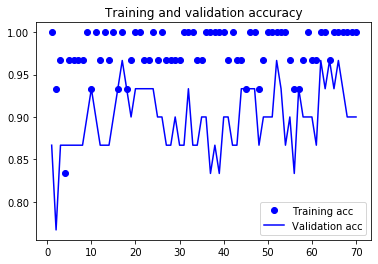

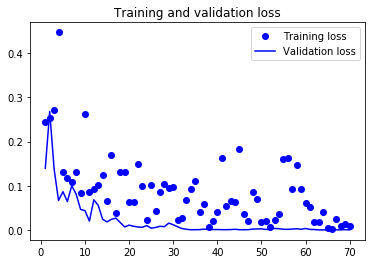

In [62]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

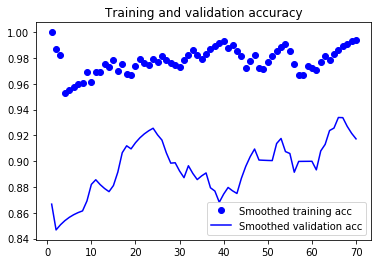

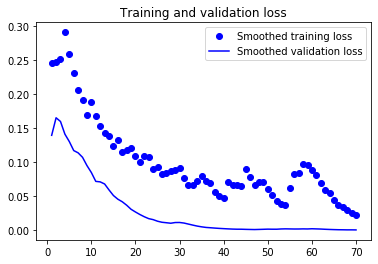

In [63]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Checking predictions

In [64]:
val_class_indices = validation_generator.__dict__['class_indices']

In [65]:
np.set_printoptions(suppress=True)

In [66]:
pred_probs = model.predict_generator(validation_generator)

In [67]:
pred_probs

array([[0.9986603 , 0.00000286, 0.00023757, 0.00000005, 0.00012346,
        0.00000272, 0.00000022, 0.00000047, 0.00000023, 0.00000014,
        0.00000556, 0.0000106 , 0.00019101, 0.00026487, 0.00000024,
        0.00000004, 0.00001107, 0.00024966, 0.00000211, 0.00014424,
        0.00004254, 0.00000016, 0.00001339, 0.00000113, 0.00002068,
        0.00000005, 0.00000036, 0.00000003, 0.00001194, 0.00000233],
       [0.00000002, 0.9999479 , 0.00000001, 0.00000009, 0.00001013,
        0.00000596, 0.0000001 , 0.00000003, 0.00000065, 0.00000017,
        0.0000084 , 0.00000001, 0.00000868, 0.00000288, 0.00000327,
        0.00000189, 0.00000438, 0.        , 0.00000022, 0.00000006,
        0.        , 0.00000039, 0.00000013, 0.00000047, 0.00000001,
        0.00000001, 0.00000007, 0.0000037 , 0.0000003 , 0.00000025],
       [0.00002837, 0.00058019, 0.8404191 , 0.00000075, 0.00000319,
        0.00001463, 0.00077643, 0.00000297, 0.0002057 , 0.00067721,
        0.00001771, 0.00000125, 0.00209586, 0.

In [68]:
validation_generator.classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

In [69]:
preds = {'first': [], 'second': []}
for i in pred_probs:
    indices = i.argsort()[-3:][::-1]
    preds['first'].append(indices[0])
    preds['second'].append(indices[1])

In [70]:
# labels = []
# for i in validation_generator.classes:
#     labels.append(np.argmax(i))

In [78]:
labels = list(validation_generator.classes)

In [79]:
preds

{'first': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  6,
  11,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  29,
  27,
  28,
  29],
 'second': [13,
  4,
  29,
  7,
  28,
  10,
  29,
  21,
  12,
  1,
  5,
  16,
  13,
  12,
  23,
  16,
  16,
  5,
  12,
  0,
  5,
  14,
  24,
  17,
  17,
  26,
  26,
  18,
  13,
  28]}

In [80]:
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [139]:
# diffs = [a_i - b_i for a_i, b_i in zip(preds['first'], labels)]

In [81]:
val_class_indices_opp = {v:k for k, v in val_class_indices.items()}

In [82]:
def get_pred_cat(cat, rank):
    category_index_model = val_class_indices[str(cat)]
#     print('category_index_model: ', category_index_model)
    index_in_labels = labels.index(category_index_model)
#     print('index_in_labels: ', index_in_labels)
#     diff_val = diffs[index_in_labels]
#     print('diff: ', diff_val)
    pred = preds[rank][index_in_labels]
    pred_category = val_class_indices_opp[pred]
    return int(pred_category)
#     print('pred_category: ', pred_category)
    # would like to know the probability here - could then calibrate

In [83]:
def get_filenames(mypath):
    onlyfiles = [f for f in os.listdir(mypath) if not f.startswith('.')]
    return onlyfiles

In [84]:
def get_photo(category, number, group):
    if group=='test':
        category_paths = [f'{base_dir}/test/{i}/' for i in range(1, 100)]
        test_img = os.path.join(category_paths[category-1], get_filenames(category_paths[category-1])[number-1])
        img = load_img(test_img)
    elif group=='train':
        category_paths = [f'{base_dir}/train/{i}/' for i in range(1, 100)]
        test_img = os.path.join(category_paths[category-1], get_filenames(category_paths[category-1])[number-1])
        img = load_img(test_img)        
    return img

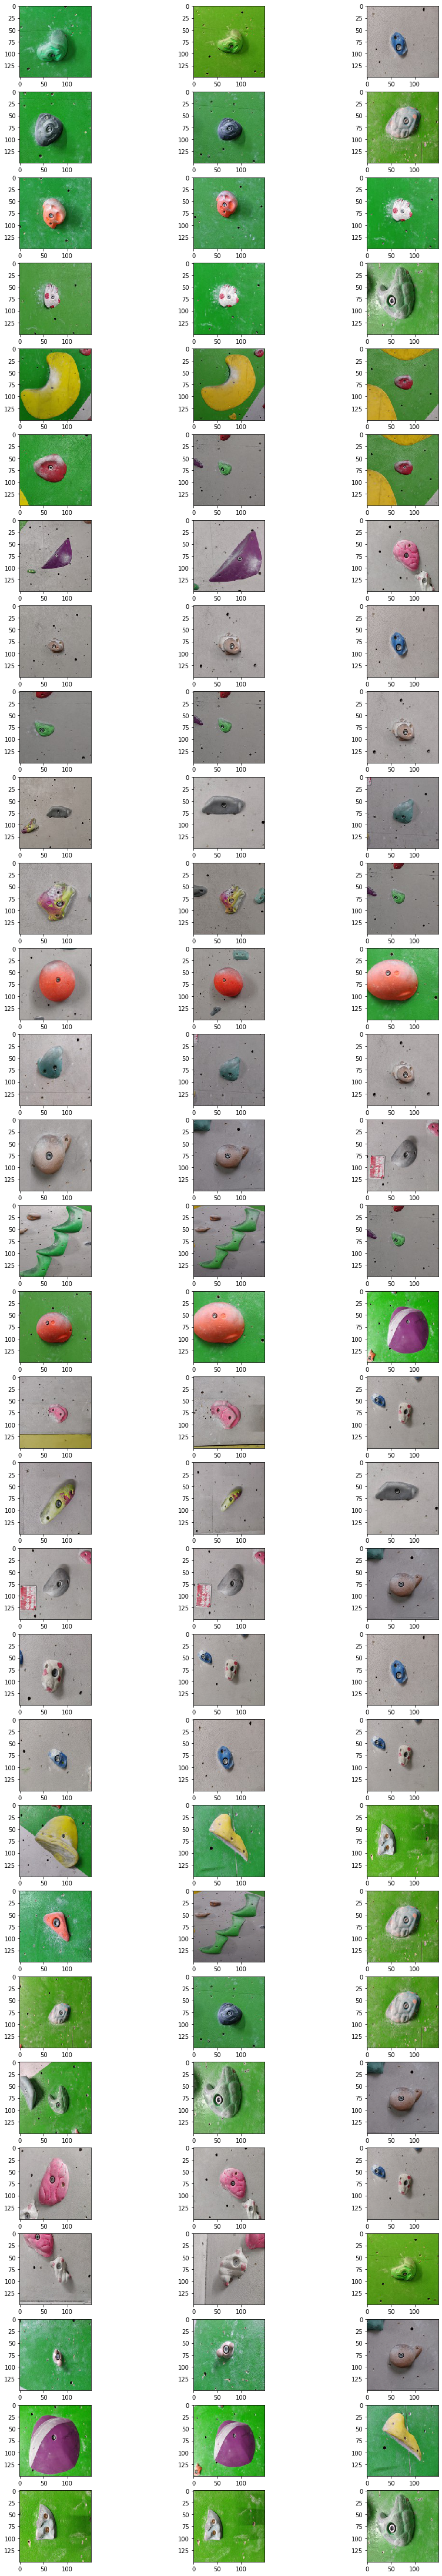

In [85]:
fig, ax = plt.subplots(no_cats, 3, figsize=(15,80))
for i in range(0, no_cats):
    ax[i, 0].imshow(get_photo(i+1, 1, 'train'))
    ax[i, 1].imshow(get_photo((get_pred_cat(i+1, 'first')), 1, 'test'))
    ax[i, 2].imshow(get_photo((get_pred_cat(i+1, 'second')), 1, 'test'))